# Árboles de decisión (DT)

## Paquetes numpy y pandas

In [1]:
import numpy as np
import pandas as pd

### Para fines de estética en la salida, se desactivan las advertencias que pueda informar el intérprete Python

In [2]:
import warnings 
warnings.filterwarnings("ignore")

## Paquetes para la construcción del gráfico

In [4]:
# Paquetes para los gráficos
import matplotlib.pyplot as plt
import graphviz 

## Importación método para creación del conjunto de entrenamiento desde paquete *sklearn*

In [5]:
from sklearn.model_selection import train_test_split

## Paquete sklearn que contiene los métodos para árboles de decisión 

In [6]:
# Métodos para árboles de decisión desde sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree

## Lectura de los datos desde el archivo *datosAB.txt*

In [7]:
# Esta es la opción para Jupyter Lab/Notebook
datos = pd.read_table("datosAB.txt", sep='\t')

## Creación de conjunto de datos 

In [8]:
# Conjunto de datos
X = datos.iloc[:,:-1]
y = datos.iloc[:,2]

## Creación de subconjutos CP y CE

In [9]:
# Se elige una semilla para la selección pseudo-aleatoria
semilla = 123456

In [10]:
X_ce, X_cp, y_ce, y_cp = train_test_split(X, y, test_size=0.3, random_state=semilla)

## Creación y ajuste del clasificador DT

In [11]:
# Entrenamiento y ajuste
clasificador = tree.DecisionTreeClassifier()
clasificador = clasificador.fit(X_ce, y_ce)

# Creación del gráfico del árbol de decisión

In [12]:
# Configuración del gráfico
dot_data = tree.export_graphviz(clasificador, out_file=None, 
    feature_names=['A','B'],  
    class_names=['r','n'],  
    filled=True, rounded=True,  
    special_characters=True) 

## Generación del gráfico

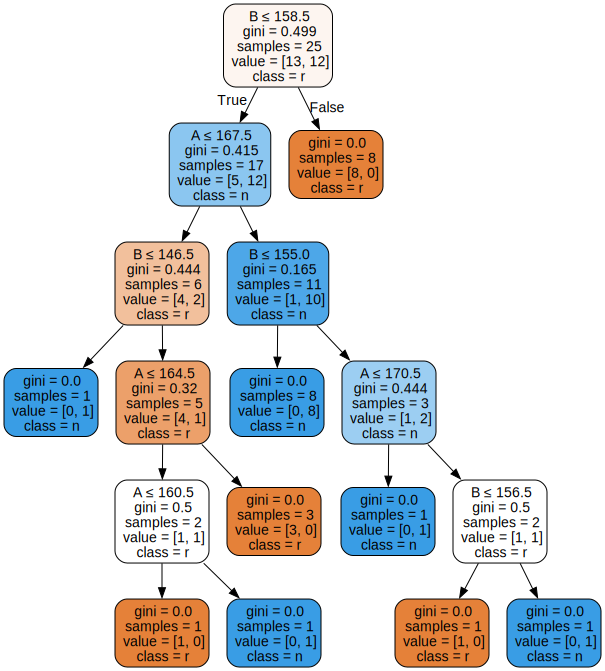

In [13]:
graph = graphviz.Source(dot_data)
graph.render("datosAB")
graph 

## Predicción

In [14]:
y_pred = clasificador.predict(X_cp)

## Creación de los resultados estadísticos de la clasificación

### Importación de método para la matriz de confusión desde paquete *sklearn*

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Cálculo de la matriz de confusión

In [16]:
mconf = confusion_matrix(y_cp, y_pred)

### Impresión de la matriz de confusión

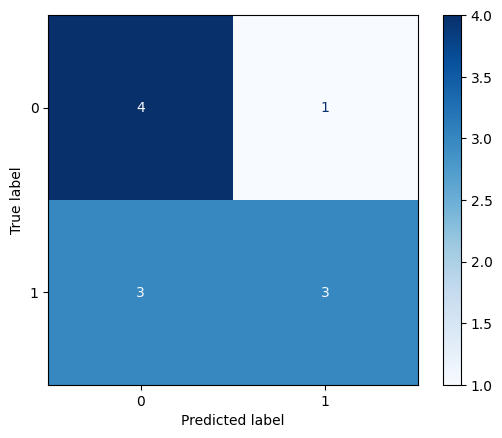

In [23]:
mconfg = ConfusionMatrixDisplay(mconf).plot(cmap='Blues') 

### Importación de método para la puntuación de precisión desde paquete *sklearn*

In [24]:
from sklearn.metrics import accuracy_score

### Cálculo de la puntuación de precisión

In [25]:
cc = accuracy_score(y_cp, y_pred)

### Impresión de la puntuación

In [26]:
print(f'Accuracy Score = {cc}')

Accuracy Score = 0.6363636363636364


## Importación de métodos para el gráfico 

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Ajuste del etiquetado de la variable y

In [28]:
# Importación del etiquetador
from sklearn.preprocessing import LabelEncoder
# Creación del etiquetador
labelencoder_y = LabelEncoder()
# Etiquetado y ajuste
y_ce = labelencoder_y.fit_transform(y_ce)

### **Nota:** Es necesario realizar el ajuste de nuevo dado que cambió la variable y debido al proceso de etiquetado

In [29]:
clasificador.fit(X_ce, y_ce)

DecisionTreeClassifier()

# Se grafica todo el conjunto de datos empleando el clasificador DT para cada dato

In [30]:
# Etiquetado y ajuste del conjunto de datos original
X_set, y_set = X, labelencoder_y.fit_transform(y)

## Creación de la malla (plano cartesiano)

In [31]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set.iloc[:,0].min()-1, stop = X_set.iloc[:,0].max()+1, step=0.1),
    np.arange(start = X_set.iloc[:,1].min()-1, stop = X_set.iloc[:,1].max()+1, step=0.1)
)

## Creación del gráfico

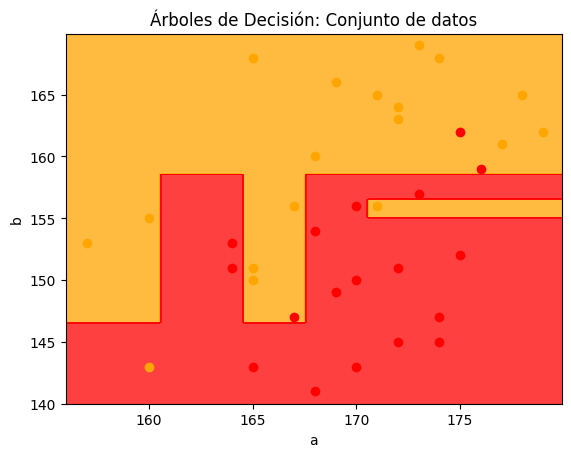

In [32]:
# Al construir la malla, se colorea la región de naranja o rojo 
# de acuerdo al clasificador DT obtenido
plt.contourf(X1, X2, 
    clasificador.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('orange', 'red'))                
)

# Se establecen los límites de los ejes x,y en el gráfico
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Se grafica cada dato en el plano cartesiano, la clase de cada dato determina el color. 
# Debido al proceso de etiquetado, 'n' fue sustituido por 0 y 'r' sustituido por 1
# 0 -> Naranja
# 1 -> Rojo
j=0
for i in y_set:
    if i==0:
        color = "orange"
    else:
        color = "red"
    plt.scatter(
        X_set.iloc[j,0],
        X_set.iloc[j,1],
        c = color,
        label = i
    )
    j=j+1

# Etiqueta del gráfico y sus ejes
plt.title('Árboles de Decisión: Conjunto de datos')
plt.xlabel('a')
plt.ylabel('b')

# Creación del gráfico
plt.show()

# Clasificar nuevos datos con DT

## Se clasifica un dato con el clasificador construido con DT

dato = (160, 145)

In [33]:
# Predicción del dato = (160, 145)
x = clasificador.predict([[160, 145]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo


## Se clasifica otro dato con el clasificador construido con DT

dato = (160, 165)

In [34]:
# Predicción del dato = (160, 165)
x = clasificador.predict([[160, 165]])
if x==0:
    print('naranja')
else:
    print('rojo')

naranja


## Ahora, a manera de prueba, se clasifica el promedio de los datos

In [35]:
# X_set es un DataFrame de pandas
X_set.mean(0)

a    169.694444
b    155.000000
dtype: float64

In [36]:
# Predicción del dato promedio = (169.6944, 155)
x = clasificador.predict([[169.6944, 155]])
if x==0:
    print('naranja')
else:
    print('rojo')

rojo
